In [98]:
import scipy.stats as stats
import numpy as np # arcsin, mean
from statistics import variance
from math import sqrt
from angle import angle_calculation
import seaborn as sn
import pandas as pd

In [99]:
def angle_test(dist_a:float,dist_b:float,uwb_res:float)->float:
    length = float(1.0)
    dist = float(3.536)
    residual = np.arcsin((dist+length)/dist_b)-np.arcsin(dist/dist_a)-uwb_res
    return residual

In [100]:
s_info=[[7.763 ,   8.232],[28.3,     28.420],[49.243  , 49.320]]


In [101]:
s=0

In [102]:
df=pd.DataFrame()
mbes=[]
for s in range(3):
    with open(f"s{s+1}","r") as f:
        file = f.readlines()
    data=[]
    for line in file:
        a = list(line.split(","))
        skip=False
        for i in range(len(a)):
            a[i]=float(a[i])
            if a[i]==0.0:
                skip=True
        if not skip:
            data.append(a)    
    residuals=[]
    records=[]
    mbe=[]
    distance_res_a=[]
    distance_res_b=[]      
    for record in data:
        dist_a=s_info[s][0]
        dist_b = s_info[s][1]
        res= angle_test(dist_a,dist_b,angle_calculation(record[0],record[2],1.0)[0])
        records.append(angle_calculation(record[0],record[2],1.0)[0])
        distance_res_a.append(dist_a-record[0])       
        residuals.append(pow(res,2))
        mbe.append(res)
    df = df.append(pd.DataFrame([[s_info[s][0], x] for x in mbe]))
    #df = df.append(pd.DataFrame())
    interval = stats.norm.interval(confidence=0.95, loc=np.mean(records), scale=stats.sem(records))
    mbe_val = float(sum(mbe)/len(mbe))
    mean_=float(sum(residuals))/len(residuals)
    quadratic_distance = [pow(x,2) for x in distance_res_a]
    mse_dist = sum(quadratic_distance)/len(quadratic_distance)
    mbe_dist = sum(distance_res_a)/len(distance_res_a)
    mbes.append(mbe_val*180/3.14)
    t_statistic, p_value = stats.ttest_1samp(a=mbe, popmean=np.mean(mbe))
    #print(t_statistic , p_value)
    print(f'For s{s+1} = {s_info[s][0]} m angle calculation: \n\tMSE is equal to {mean_} radians, which means {mean_*180/3.14} degrees, \n\tRMSE is equal to {sqrt(mean_*180/3.14)}, \n\tMBE is equal to {mbe_val*180/3.14}')
    print(f"\tConfidence interval is equal to {interval} in radians")
    #print(f'For s{s+1} distance calculation: \n\tMSE is equal to {mse_dist}, \n\tRMSE is equal to {sqrt(mse_dist)}, \n\tMBE is equal to {mbe_dist}')

For s1 = 7.763 angle calculation: 
	MSE is equal to 0.00014543671001269684 radians, which means 0.008337136242766061 degrees, 
	RMSE is equal to 0.09130791993450547, 
	MBE is equal to 0.5032460513212865
	Confidence interval is equal to (0.10124837627815819, 0.10251289003896014) in radians
For s2 = 28.3 angle calculation: 
	MSE is equal to 2.1075348545135615e-08 radians, which means 1.2081409994026785e-06 degrees, 
	RMSE is equal to 0.001099154674921905, 
	MBE is equal to 0.005700889953718477
	Confidence interval is equal to (0.03490558852451156, 0.034929563920563955) in radians
For s3 = 49.243 angle calculation: 
	MSE is equal to 1.7905218635311133e-08 radians, which means 1.0264138071197466e-06 degrees, 
	RMSE is equal to 0.0010131208255285973, 
	MBE is equal to 0.006901823846040202
	Confidence interval is equal to (0.02010424813282777, 0.020118841349841248) in radians


C:\Users\48604\AppData\Local\Temp\ipykernel_11856\2718596703.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[s_info[s][0], x] for x in mbe]))


Text(0, 0.5, 'Mean Biased Error')

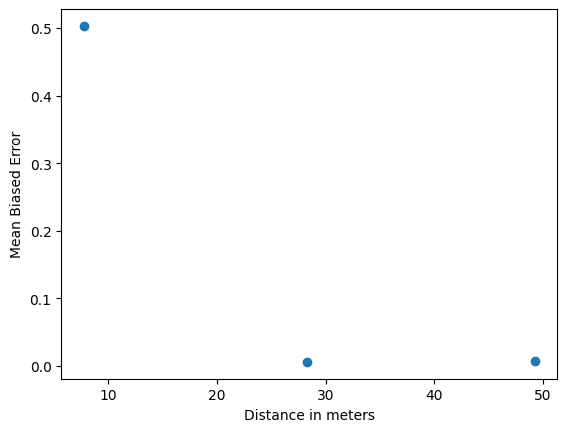

In [103]:
import matplotlib.pyplot as plt
x_axis=[7.763,28.3,49.243]
mbes_vis = pd.DataFrame(zip(x_axis,mbes))
plt.scatter(x=mbes_vis[0],y=mbes_vis[1])
plt.xlabel("Distance in meters")
plt.ylabel("Mean Biased Error")

Text(0, 0.5, 'Difference between calculated value and actual value in radians')

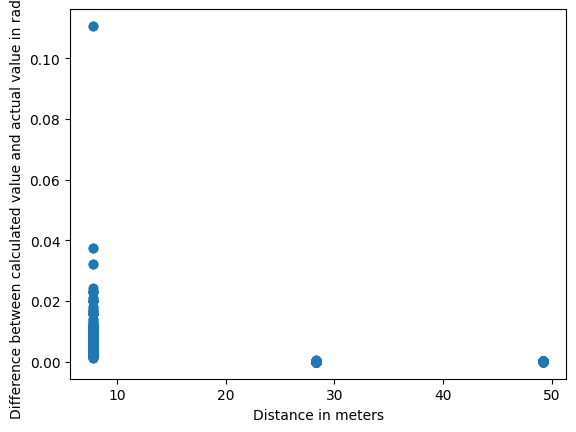

In [104]:
import matplotlib.pyplot as plt
plt.scatter(x=df[0],y=df[1])
plt.xlabel("Distance in meters")
plt.ylabel("Difference between calculated value and actual value in radians")